In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [163]:
# Read data
df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")[['v1', 'v2']]
df.columns = ['label', 'text']
print(df)

     label                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


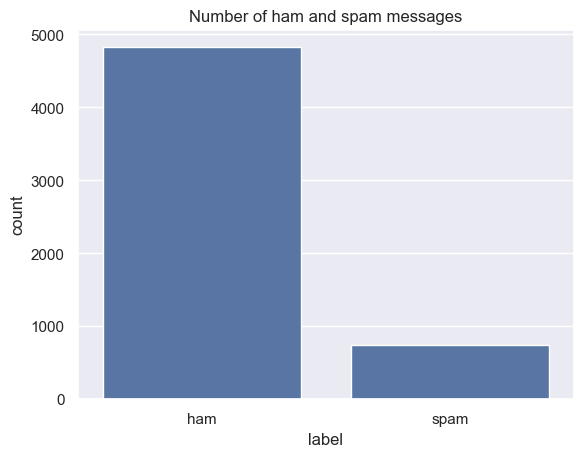

In [164]:
# Calculate the ham/spam count
#df.groupby('label').describe()
df.info()
sb.set()
sb.countplot(data = df, x= df["label"]).set_title("Number of ham and spam messages")
plt.show()

In [165]:
# TODO: Use CountVectorizer to convert training and testing data into a matrix (based on train data)¶
# Step 1: Split data into Train and test data (70%/30%)
# Step 2: Fit the CountVectorizer with the training data such that we know the vocabulary.
#         Moreover, we count how frequently a word has been used. This will be used in the Multinomial naive bayes.
# Step 3: Transform the training and testing dataset into two separate matrices.
#         (One new column for every word in the messages and counts how often they have been used in each message)

# Step 1: Randomly split the data (Hint: Use "train_test_split" at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'],train_size=0.70,test_size=0.30)

# Step 2: Fit the CountVectorizer (Hint: Check the example at https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)   
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)

# Step 3: Transform the training and testing dataset into two separate matrices (Hint: Check https://scikit-learn.org/0.15/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.transform)
X_test = vectorizer.transform(X_test)

In [166]:
# TODO: Use MultinomialNB() to train a spam filter with the training dataset X_train, y_train
# Hint: Check the example at https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.MultinomialNB.html
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [167]:
# TODO: Test the spam filter by using the testing dataset X_test, y_test
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9868421052631579


In [151]:
# For Problem 5(b): different prior
# Define prior distributions to test
prior_values = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]

for prior in prior_values:
    # Set priors for "spam" and "ham"
    custom_priors = [prior, 1 - prior]
    
    # List to store accuracy results for the current prior
    accuracies = []

    for _ in range(20):
        # Step 1: Randomly split the data (85% train, 15% test)
        X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], train_size=0.85, test_size=0.15)

        # Step 2: Fit the CountVectorizer
        vectorizer = CountVectorizer()
        X_train = vectorizer.fit_transform(X_train)

        # Step 3: Transform the training and testing datasets into matrices
        X_test = vectorizer.transform(X_test)

        # Train the Naive Bayes model with custom priors
        model = MultinomialNB(class_prior=custom_priors)
        model.fit(X_train, y_train)

        # Test the spam filter and calculate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store accuracy in the list
        accuracies.append(accuracy)

    # Calculate and print the average accuracy for the current prior
    average_accuracy = sum(accuracies) / len(accuracies)
    print(f"Avg. Accuracy over 20 runs of prior [{custom_priors[0]:.2f}, {custom_priors[1]:.2f}]: {average_accuracy:.5f}")


Avg. Accuracy over 20 runs of prior [0.50, 0.50]: 0.97883
Avg. Accuracy over 20 runs of prior [0.55, 0.45]: 0.98122
Avg. Accuracy over 20 runs of prior [0.60, 0.40]: 0.98343
Avg. Accuracy over 20 runs of prior [0.65, 0.35]: 0.98343
Avg. Accuracy over 20 runs of prior [0.70, 0.30]: 0.98553
Avg. Accuracy over 20 runs of prior [0.75, 0.25]: 0.98612
Avg. Accuracy over 20 runs of prior [0.80, 0.20]: 0.98571
Avg. Accuracy over 20 runs of prior [0.85, 0.15]: 0.98876
Avg. Accuracy over 20 runs of prior [0.90, 0.10]: 0.98768


In [155]:
# For Problem 5(b): different data partition
# Define prior distributions to test
partition = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
custom_priors = [0.7, 0.3]
for val in partition:
    # Set priors for "spam" and "ham"
    trainSize = val
    testSize = 1 - val
    
    # List to store accuracy results for the current prior
    accuracies = []

    for _ in range(20):
        # Step 1: Randomly split the data (85% train, 15% test)
        X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], train_size=trainSize, test_size=testSize)

        # Step 2: Fit the CountVectorizer
        vectorizer = CountVectorizer()
        X_train = vectorizer.fit_transform(X_train)

        # Step 3: Transform the training and testing datasets into matrices
        X_test = vectorizer.transform(X_test)

        # Train the Naive Bayes model with custom priors
        model = MultinomialNB(class_prior=custom_priors)
        model.fit(X_train, y_train)

        # Test the spam filter and calculate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store accuracy in the list
        accuracies.append(accuracy)

    # Calculate and print the average accuracy for the current prior
    average_accuracy = sum(accuracies) / len(accuracies)
    print(f"Avg. Accuracy over 20 runs of partition of data [{trainSize:.2f}, {testSize:.2f}]: {average_accuracy:.5f}")


Avg. Accuracy over 20 runs of partition of data [0.10, 0.90]: 0.97215
Avg. Accuracy over 20 runs of partition of data [0.20, 0.80]: 0.97834
Avg. Accuracy over 20 runs of partition of data [0.30, 0.70]: 0.98049
Avg. Accuracy over 20 runs of partition of data [0.40, 0.60]: 0.98162
Avg. Accuracy over 20 runs of partition of data [0.50, 0.50]: 0.98272
Avg. Accuracy over 20 runs of partition of data [0.60, 0.40]: 0.98284
Avg. Accuracy over 20 runs of partition of data [0.70, 0.30]: 0.98376
Avg. Accuracy over 20 runs of partition of data [0.80, 0.20]: 0.98372
Avg. Accuracy over 20 runs of partition of data [0.90, 0.10]: 0.98306
